## Author - WAI YAN NYEIN NAING @ WILLIAM

## Data Understanding, Prerpocessing, Visualization 

## Contents

- Fetch and visually inspect a dataset 
- Image Preprocessing
- Data Augmentation Techniques
- Address Imbalanced Dataset Problem
- Organize a dataset into training, validation and testing groups
- Finalize an augmented dataset for training, and testing



# 1) Import Libraries

In [1]:
%matplotlib inline
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
from PIL import Image
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 2) Visualization

Number of image in the Dataset =>  100
<PIL.PngImagePlugin.PngImageFile image mode=L size=1024x1024 at 0x26235340DD8>


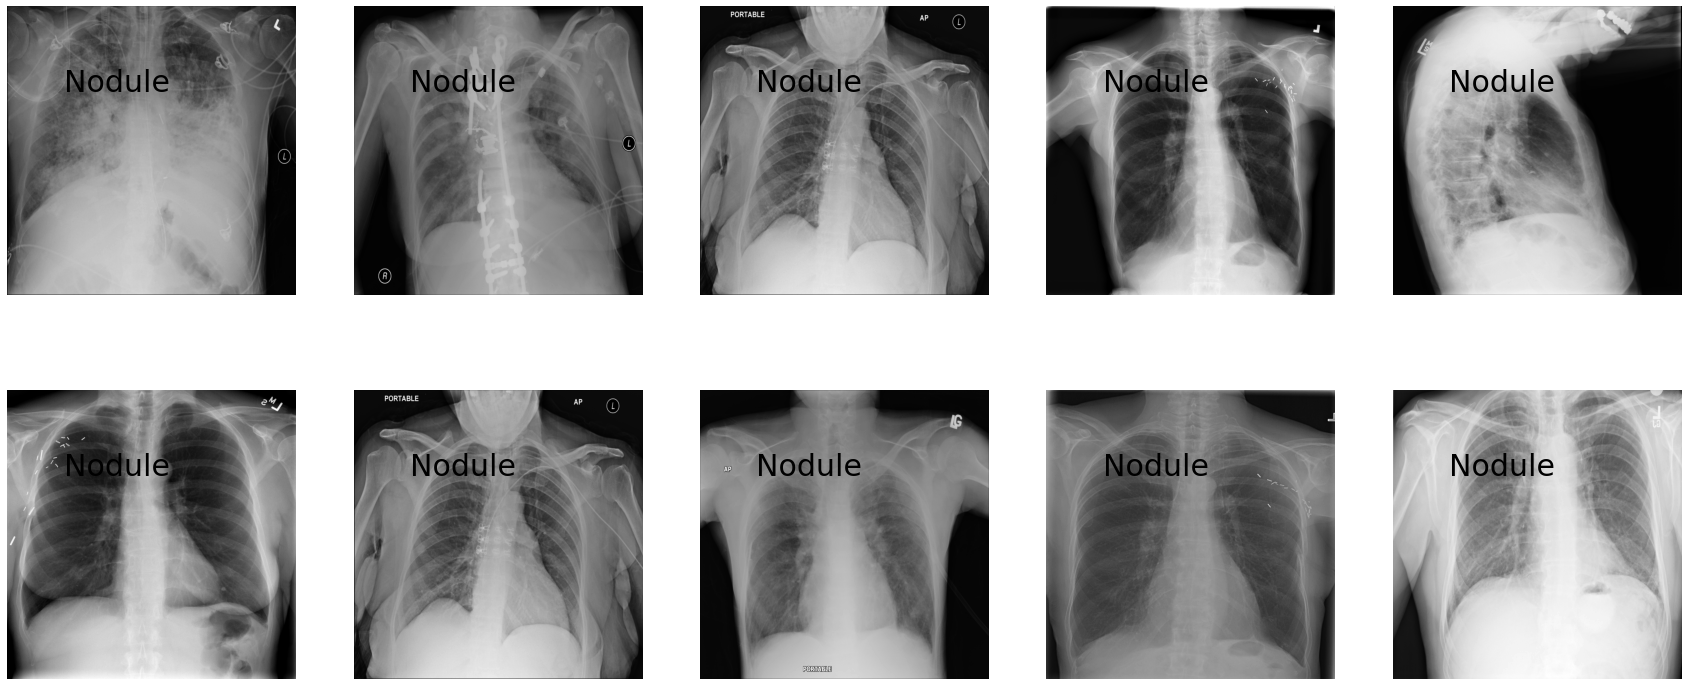

In [2]:
#Read the data from path
image_list = []
for filename in glob.glob('Dataset1/Nodule/*.png'):
    im = Image.open(filename)
    image_list.append(im)
print("Number of image in the Dataset => ", len(image_list))

#Visualize the data from image_list
plt.figure(figsize=(30,20))
columns = 5
random_image = []

for i in range(10):
    rlist = random.randrange(0, 100, 1)
    random_image.append(image_list[rlist])
    
for i, image in enumerate(random_image):
    plt.subplot( len(random_image) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.gray()
    plt.text(200, 300, "Nodule", fontsize=30)
    
print(image)

Number of image in the Dataset =>  2468
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=400x400 at 0x262353400B8>


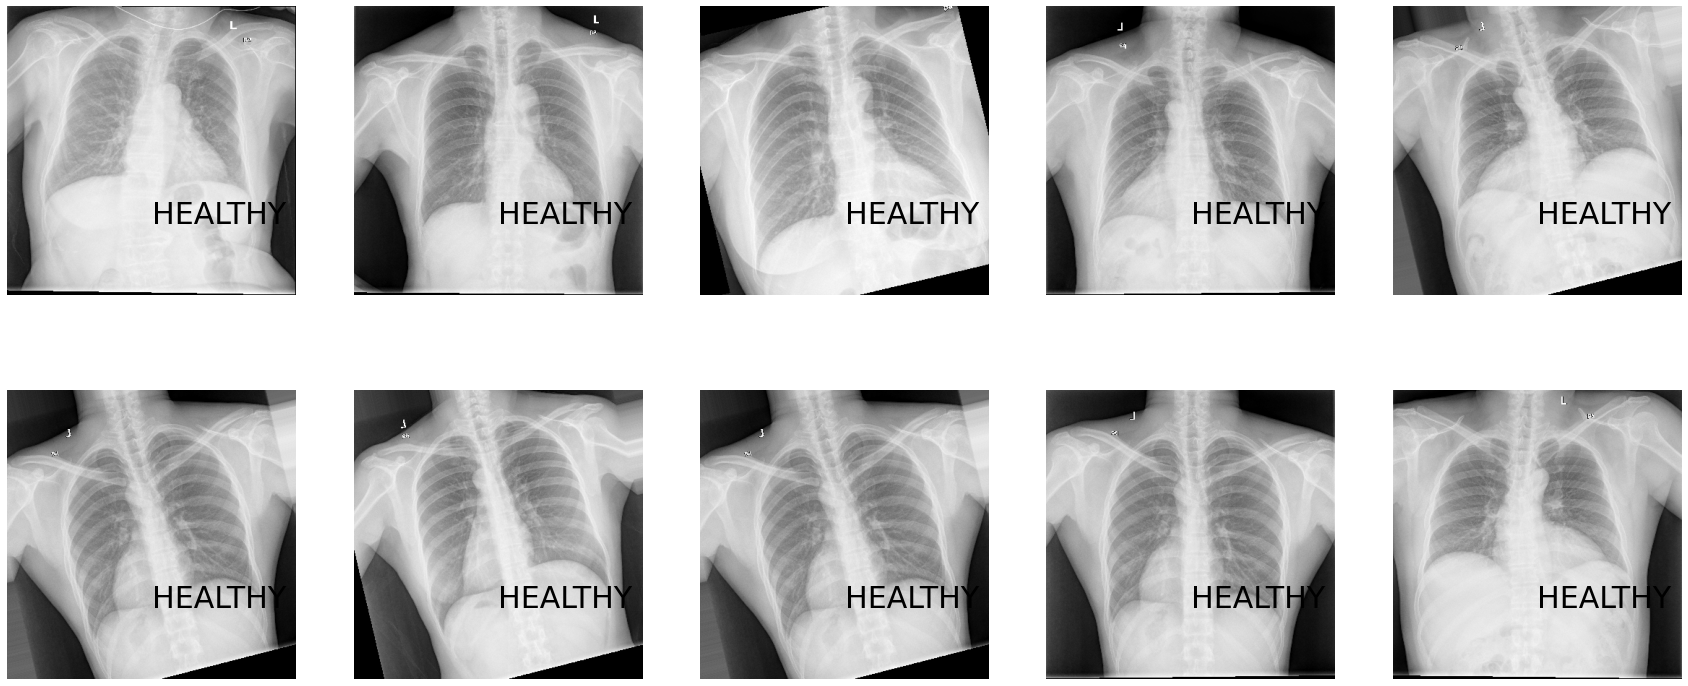

In [5]:
#Read the data from path, Add "Lable2" to image_list
image_list = []
for filename in glob.glob('Dataset1/HEALTHY/*.png'):
    im = Image.open(filename)
    image_list.append(im)
print("Number of image in the Dataset => ", len(image_list))

#Visualize the data from image_list
plt.figure(figsize=(30,20))
columns = 5
random_image = []

for i in range(10):
    rlist = random.randrange(0, 100, 1)
    random_image.append(image_list[rlist])
    
for i, image in enumerate(random_image):
    plt.subplot( len(random_image) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.gray()
    plt.text(200, 300, "HEALTHY", fontsize=30)
    
print(image)

# 3) Check Folder Structure

To summarize and confirm our progress, we can take a look at the folder tree structure in **T_V_T (Train,Validation,Test)** to take a look at our images we used to create a smaller subset. 

Click the cell below and then click **Run**.

In [8]:
import os 
data_path = "Dataset1/T_V_T/"

#Confirm Folder Structure
for root, dirs, files in os.walk(data_path):
    level = root.replace(os.getcwd(), '').count(os.sep)
    print('{0}{1}/'.format('    ' * level, os.path.basename(root)))
    for f in files[:2]:
        print('{0}{1}'.format('    ' * (level + 1), f))
    if level is not 0:
        print('{0}{1}'.format('    ' * (level + 1), "..."))        

/
test/
    Atelectasis/
        Atelectasis9018_ (2).png
        Atelectasis9018_ (3).png
        ...
    COVID19/
        1-s2.0-S0140673620303706-fx1_lrg.jpg
        auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
        ...
    Effusion/
        00008577_000.png
        00008585_000.png
        ...
    HEALTHY/
        HEALTHY (1).jpeg
        HEALTHY (1).png
        ...
    Mass/
        Mass7372_ (10).png
        Mass7372_ (11).png
        ...
    Nodule/
        Nodule1 (11).png
        Nodule1 (13).png
        ...
    NonXray/
        6158.jpg
        6186.jpg
        ...
    No_Finding/
        No Finding3485_.png
        No Finding3486_.png
        ...
    PNEUMONIA/
        person896_bacteria_2821.jpeg
        person896_virus_1548.jpeg
        ...
    TB/
        CHNCXR_0628_1rotate_Z_0_4066.png
        CHNCXR_0628_1rotate_Z_0_4066rotate_Z_0_4066.png
        ...
train/
    Atelectasis/
        Atelectasis1022_ (2).png
        Atelectasis1022_ (3).png


# 4) Create Train, Validation and Test Folders


We need to create training, validation and test folders for data ingestion and we'll use 0.7, 0.1, 0.2 ratio for this purpose.

Click the cell below and then click **Run**.

In [ ]:
import math
import re
import sys
import shutil

#Train and Test Set Variables
train_val_test_ratio = (.7,.25,.05) # 70/10/20 Data Split
test_folder = 'Dataset1/T_V_T/test/'
train_folder = 'Dataset1/T_V_T/train/'
val_folder = 'Dataset1/T_V_T/val/'

file_names = os.listdir('Dataset1')


#Remove Existing Folders if they exist
for folder in [test_folder, train_folder, val_folder]:
    if os.path.exists(folder) and os.path.isdir(folder):
        shutil.rmtree(folder)

#Remake Category Folders in both Train and Test Folders
for category in file_names:
    os.makedirs(test_folder + category)
    os.makedirs(train_folder + category)
    os.makedirs(val_folder + category)

#Split Data by Train Ratio and copy files to correct directory
for idx, category in enumerate(file_names):
    file_list = os.listdir(data_path + '/' + category)
    
    train_ratio = math.floor(len(file_list) * train_val_test_ratio[0])
    val_ratio = math.floor(len(file_list) * train_val_test_ratio[1])
    train_list = file_list[:train_ratio]
    val_list = file_list[train_ratio:train_ratio + val_ratio]
    test_list = file_list[train_ratio + val_ratio:]
    
    for i, file in enumerate(train_list):
        shutil.copy(data_path + '/' + category + '/' + file, train_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s train images to category folder %s' % (len(train_list), category))  
    sys.stdout.write('\n')
    for i, file in enumerate(val_list):
        shutil.copy(data_path + '/' + category + '/' + file, val_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s validation images to category folder %s' % (len(val_list), category))                   
    sys.stdout.write('\n')
    for i, file in enumerate(test_list):
        shutil.copy(data_path + '/' + category + '/' + file, test_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s test images to category folder %s' % (len(test_list), category))
    sys.stdout.write('\n')
    print(" ")
    
print("Done.")  

In [ ]:
#Confirm Folder Structure
for root, dirs, files in os.walk(data_path):
    level = root.replace(os.getcwd(), '').count(os.sep)
    print('{0}{1}/'.format('    ' * level, os.path.basename(root)))
    for f in files[:2]:
        print('{0}{1}'.format('    ' * (level + 1), f))
    if level is not 0:
        print('{0}{1}'.format('    ' * (level + 1), "..."))        

# 5) Distribution of Selected Classes

Now, we can take a look at the class distribution of our problem statement. We're importing PyGal and creating a wrapper for rendering the chart inline, then passing in our data to the charting function.


# Train

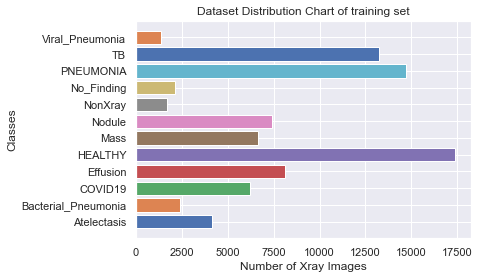

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)


data_path_train = "Dataset1/T_V_T/train"

# Customize the plot

plt.xlabel("Number of Xray Images")
plt.ylabel("Classes")
plt.title("Dataset Distribution Chart of training set")

for o in os.listdir(data_path_train):
    plt.barh(o, len(os.listdir(os.path.join(data_path_train, o))))

# Validation

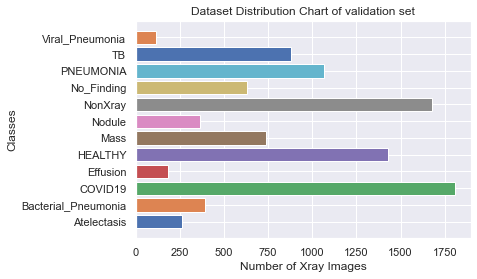

In [16]:
data_path_val = "Dataset1/T_V_T/val"

# Customize the plot

plt.xlabel("Number of Xray Images")
plt.ylabel("Classes")
plt.title("Dataset Distribution Chart of validation set")

for o in os.listdir(data_path_val):
     plt.barh(o, len(os.listdir(os.path.join(data_path_val, o))))

# Test

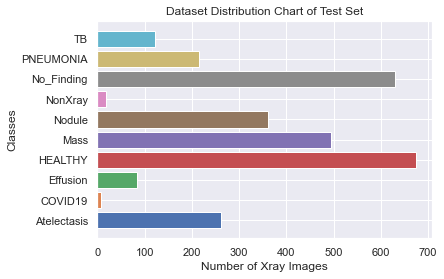

In [17]:
data_path_test = "Dataset1/T_V_T/test"

# Customize the plot

plt.xlabel("Number of Xray Images")
plt.ylabel("Classes")
plt.title("Dataset Distribution Chart of Test Set")

for o in os.listdir(data_path_test):
     plt.barh(o, len(os.listdir(os.path.join(data_path_test, o))))

# 6) Data Augmentation

While looking at our distribution above we saw that certain classes were significantly lower than others.  To help mitigate that issue we're going to augment some of our data set so that we have a dataset that is more closely distributed.  Below we're taking a look at an example image and showing the effets of augmentation given a certain threshold of modification.  Then we're going to apply these random augmentations to our data.

Click the cell below and then click **Run**.

# Feature Standardization

In [ ]:
# import random
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# # define data preparation
# datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# datagen = ImageDataGenerator(zca_whitening=True)

# #Load example image
# file_list = glob.glob("Dataset1/T_V_T/test/COVID19/*")
# img_path = random.choice(file_list)
# img = load_img(img_path)
# car_class = img_path.split("/")[1]
# plt.imshow(img)
# plt.axis("off")
# plt.title("Original " + car_class, fontsize=16)

# img = img_to_array(img)
# img = img.reshape((1,) + img.shape)

# #Apply different augmentation techniques
# n_augmentations = 4
# plt.figure(figsize=(15, 6))    
# i = 0
# for batch in datagen.flow(img, 
#                           batch_size=1, 
#                           seed=21,save_to_dir='Raw_aug_images', save_prefix='aug_feature_standardize', save_format='png'):
    
#     plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
#     plt.imshow(array_to_img(batch[0]))
#     plt.axis("off")
#     plt.suptitle("Augmented_Feat_Standardization", fontsize=16)    
    
#     i += 1
#     if i >= n_augmentations:
#         break

# ZCA Whitening

In [ ]:
# # define data preparation
# datagen = ImageDataGenerator(zca_whitening=True)

# #Load example image
# file_list = glob.glob("Dataset1/T_V_T/test/*/*")
# img_path = random.choice(file_list)
# img = load_img(img_path)
# car_class = img_path.split("/")[1]
# plt.imshow(img)
# plt.axis("off")
# plt.title("Original " + car_class, fontsize=16)

# img = img_to_array(img)
# img = img.reshape((1,) + img.shape)

# #Apply different augmentation techniques
# n_augmentations = 4
# plt.figure(figsize=(15, 6))    
# i = 0
# for batch in datagen.flow(img, 
#                           batch_size=1, 
#                           seed=21,save_to_dir='Raw_aug_images', save_prefix='aug_ZCA_whitening', save_format='png'):
    
#     plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
#     plt.imshow(array_to_img(batch[0]))
#     plt.axis("off")
#     plt.suptitle("Augmented_ZCA", fontsize=16)    
    
#     i += 1
#     if i >= n_augmentations:
#         break

# Rotation

In [ ]:
# define data preparation
from random import randrange

datagen = ImageDataGenerator(rotation_range=randrange(-30,30))

#Load example image
file_list = glob.glob("Dataset1/T_V_T/test/COVID19/*")
img_path = random.choice(file_list)
img = load_img(img_path)
car_class = img_path.split("/")[1]
plt.imshow(img)
plt.axis("off")
plt.title("Original " + car_class, fontsize=16)

img = img_to_array(img)
img = img.reshape((1,) + img.shape)

#Apply different augmentation techniques
n_augmentations = 4
plt.figure(figsize=(15, 6))    
i = 0
for batch in datagen.flow(img, 
                          batch_size=1, 
                          seed=21,save_to_dir='Raw_aug_images', save_prefix='aug_random_Rotate', save_format='png'):
    
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    plt.suptitle("Augmented_RandomRotate", fontsize=16)    
    
    i += 1
    if i >= n_augmentations:
        break

# Random Shifts

In [ ]:
# define data preparation
shift = 0.15
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

#Load example image
file_list = glob.glob("Dataset1/T_V_T/test/COVID19/*")
img_path = random.choice(file_list)
img = load_img(img_path)
car_class = img_path.split("/")[1]
plt.imshow(img)
plt.axis("off")
plt.title("Original " + car_class, fontsize=16)

img = img_to_array(img)
img = img.reshape((1,) + img.shape)

#Apply different augmentation techniques
n_augmentations = 4
plt.figure(figsize=(15, 6))    
i = 0
for batch in datagen.flow(img, 
                          batch_size=1, 
                          seed=21,save_to_dir='Raw_aug_images', save_prefix='aug_random_shift', save_format='png'):
    
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    plt.suptitle("Augmented_RandomShift", fontsize=16)    
    
    i += 1
    if i >= n_augmentations:
        break

# Random Flips + Saving to the Directory

In [ ]:
#Save to direction with Keras

# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=False)

#Load example image
file_list = glob.glob("Dataset1/T_V_T/test/COVID19/*")
img_path = random.choice(file_list)
img = load_img(img_path)
car_class = img_path.split("/")[1]
plt.imshow(img)
plt.axis("off")
plt.title("Original " + car_class, fontsize=16)

img = img_to_array(img)
img = img.reshape((1,) + img.shape)

#Apply different augmentation techniques
n_augmentations = 4
plt.figure(figsize=(15, 6))    
i = 0
for batch in datagen.flow(img, 
                          batch_size=1, 
                          seed=21,save_to_dir='Raw_aug_images', save_prefix='aug_random_flip', save_format='png'):
    
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    plt.suptitle("Augmented_RandomFlip", fontsize=16)    
    
    i += 1
    if i >= n_augmentations:
        break

# Zoom Range

In [ ]:
# define data preparation
datagen = ImageDataGenerator(zoom_range=0.2)

#Load example image
file_list = glob.glob("Dataset1/T_V_T/test/COVID19/*")
img_path = random.choice(file_list)
img = load_img(img_path)
car_class = img_path.split("/")[1]
plt.imshow(img)
plt.axis("off")
plt.title("Original " + car_class, fontsize=16)

img = img_to_array(img)
img = img.reshape((1,) + img.shape)

#Apply different augmentation techniques
n_augmentations = 4
plt.figure(figsize=(15, 6))    
i = 0
for batch in datagen.flow(img, 
                          batch_size=1, 
                          seed=21,save_to_dir='Raw_aug_images', save_prefix='aug_zoom_shear', save_format='png'):
    
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    plt.suptitle("Augmented_ZoomRange", fontsize=16)    
    
    i += 1
    if i >= n_augmentations:
        break

# Shear Range + FillMode='Nearest'

In [ ]:
datagen = ImageDataGenerator(shear_range=0.2,fill_mode='nearest')

#Load example image
file_list = glob.glob("Dataset1/T_V_T/test/COVID19/*")
img_path = random.choice(file_list)
img = load_img(img_path)
car_class = img_path.split("/")[1]
plt.imshow(img)
plt.axis("off")
plt.title("Original " + car_class, fontsize=16)

img = img_to_array(img)
img = img.reshape((1,) + img.shape)

#Apply different augmentation techniques
n_augmentations = 4
plt.figure(figsize=(15, 6))    
i = 0
for batch in datagen.flow(img, 
                          batch_size=1, 
                          seed=21,save_to_dir='Raw_aug_images', save_prefix='aug_fillmode_nearest_shear', save_format='png'):
    
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    plt.suptitle("Augmented_Shear+FillMode_Nearest", fontsize=16)    
    
    i += 1
    if i >= n_augmentations:
        break

# Combined

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=randrange(-30,30),
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

#Load example image
file_list = glob.glob("Dataset1/T_V_T/test/COVID19/*")
img_path = random.choice(file_list)
img = load_img(img_path)
car_class = img_path.split("/")[1]
plt.imshow(img)
plt.axis("off")
plt.title("Original " + car_class, fontsize=16)

img = img_to_array(img)
img = img.reshape((1,) + img.shape)

#Apply different augmentation techniques
n_augmentations = 4
plt.figure(figsize=(15, 6))    
i = 0
for batch in datagen.flow(img, 
                          batch_size=1, 
                          seed=21,save_to_dir='Raw_aug_images', save_prefix='aug_combine', save_format='png'):
    
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    plt.suptitle("Augmented_Combined", fontsize=16)    
    
    i += 1
    if i >= n_augmentations:
        break

## Finalize Augmented Dataset for Training 

![Data Augmentation](assets/EDA_1-5.png)

By using the augmentation techniques we have learned, we can oversample minority classes in training set. We are not going to do these steps in validation or test in order not to create any bias on the data. 

**Activity**

Click the cell below and then click **Run**.

## Look at Distribution of Selected Classes again

![View New Data Distribution](assets/EDA_1-7.png)

Now that we've done some augmentation to the dataset we want to see how the distribution has changed compared to before the augmentation.  In this case we're only going to be looking at the train folder, since we only augmented the train dataset, so the numbers will be slightly lower than the full dataset distribution graph from earlier.  

Click the cell below and then click **Run**.

# Final Part (Augmentation)

# Data Augmentation of each Folder

In [ ]:
#Train and Test Set Variables
#train_val_test_ratio = (.7,.1,.2) # 70/10/20 Data Split


test_folder = 'Dataset1/T_V_T/test/'
train_folder = 'Dataset1/T_V_T/train/'
val_folder = 'Dataset1/T_V_T/val/'


"""
changable parameter = class_to_argument
                    = data_dir => train_folder
                    = save_prefix => "+ augmented_Z"
                    
Previous
ZCA , Feature Standardization
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,zca_whitening=True)



#Default
 datagen = ImageDataGenerator(rotation_range=1, 
                                 width_shift_range=0.1, 
                                 height_shift_range=0, 
                                 zoom_range=0.1, 
                                 vertical_flip=False,
                                 horizontal_flip=True,
                                 fill_mode="nearest")




"""
#Oversampling Minority Classes in Training Set
def data_augment(data_dir):
    list_of_images = os.listdir(data_dir)
    datagen = ImageDataGenerator(
        rotation_range=randrange(-30,30),
        width_shift_range=0.1,
        height_shift_range=0.1,
        #shear_range=0.1,
        #zoom_range=0.1,
        horizontal_flip=True,
        brightness_range= (0.1,0.9),
        fill_mode='nearest')

    for img_name in list_of_images:
        tmp_img_name = os.path.join(data_dir, img_name)
        img = load_img(tmp_img_name)
        img = img_to_array(img)
        img = img.reshape((1,) + img.shape)

        batch = datagen.flow(img, 
            batch_size=50, 
            seed=41,
            save_to_dir=data_dir, 
            save_prefix=img_name.split(".png")[0] + "rotate_2",  #need to change
            save_format="png")

        batch.next()

classes_to_augment = ["COVID19"]                              #Class

for class_names in classes_to_augment:
    print("Currently Augmenting:", class_names)                
    data_dir = os.path.join(val_folder, class_names)       #Train,Validation
    data_augment(data_dir)

In [ ]:
data_path_train = "Dataset1/T_V_T/train"

# Customize the plot

plt.xlabel("Number of Xray Images")
plt.ylabel("Classes")
plt.title("Dataset Distribution Chart of training set")

for o in os.listdir(data_path_train):
    plt.barh(o, len(os.listdir(os.path.join(data_path_train, o))))

In [ ]:
data_path_val = "Dataset1/T_V_T/val"

# Customize the plot

plt.xlabel("Number of Xray Images")
plt.ylabel("Classes")
plt.title("Dataset Distribution Chart of validation set")

for o in os.listdir(data_path_val):
     plt.barh(o, len(os.listdir(os.path.join(data_path_val, o))))

In [ ]:
data_path_test = "Dataset1/T_V_T/test"

# Customize the plot

plt.xlabel("Number of Xray Images")
plt.ylabel("Classes")
plt.title("Dataset Distribution Chart of Test Set")

for o in os.listdir(data_path_test):
     plt.barh(o, len(os.listdir(os.path.join(data_path_test, o))))

# 7) Resize Images

![Resize Images](assets/EDA_1-6.png)

Depending on the toplogy, we need to resize the images with the expected image format. Since we're going to be using InceptionV3 in the next section we're going to match the size, 299x299, for that topology. 

**Activity**

Click the cell below and then click **Run**.

In [ ]:
from functools import partial
from multiprocessing import Pool
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_folder = 'Dataset/T_V_T/train/'

#Resize Images
if __name__ == '__main__':
    pool = Pool()
    image_list = glob.glob(train_folder + "/*/*")
    func = partial(vmmr_utils.resize_image, size=400)
    pool.map(func, image_list)
    pool.close()

#vmmr_utils.display_images(train_folder)

In [ ]:
from functools import partial
from multiprocessing import Pool


image_list = []


for filename in glob.glob('Dataset/T_V_T/train/Normal/*.png'):
    im = Image.open(filename)
    image_list.append(im)
    
print(len(image_list))

plt.figure(figsize=(30,20))
columns = 5

for i, image in enumerate(image_list[:10]):
    plt.subplot( len(image_list[:10]) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.text(200, 300, "Normal", fontsize=30)


In [ ]:
image_list = []


for filename in glob.glob('Dataset/T_V_T/train/TB/*.png'):
    im = Image.open(filename)
    image_list.append(im)
    
print(len(image_list))

plt.figure(figsize=(30,20))
columns = 5

for i, image in enumerate(image_list[:10]):
    plt.subplot( len(image_list[:10]) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.text(200, 300, "TB", fontsize=30)

## Notes


